<a href="https://colab.research.google.com/github/JuanR-D/Actividades-Equipo-IA/blob/main/ACT6_EQUIPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Actividad 6: Aprendizaje supervisado, árbol de decisión**
#Walter Aldair Torres Avila 1999749 IMTC
#Edson de jesus olivares vazquez 2002238
#Tovar Zepeda RogelioJesús 2011149
#Juan Carlos Reyes Delgadillo 2011149

**1-CARGAR LIBREIRAS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import numpy as np

**2-CARGAR DATOS**

In [ ]:
df = df = pd.read_csv('/data.csv')
df.shape

#Quitar columnas sin nombres si es que hay
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.shape

#verificar valores nulos
null_values = df.isnull().values.any()
if null_values == True:
    print("There are some missign values in data")
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


**3-PREPROCESAMIENTO DE DATOS**

In [ ]:
#CAMBIAR MALIGNO A 1 Y BENIGNO A 0 DIVIDIR DATOS EN DOS TIPOS
print("Maligno = 1, Benigno = 0")
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)
df.head()
df.diagnosis.unique()
np.array([1, 0], dtype=np.int64)
df["diagnosis"].value_counts()
print(df["diagnosis"].mean())

Maligno = 1, Benigno = 0
0.37258347978910367


**4-SELECCION Y ENTRENAMIENTO DEL MODELO**

In [ ]:

# Define las características (X) y las etiquetas (y)
X = df.drop('diagnosis', axis=1) # 'diagnosis' es la columna de etiquetas
y = df['diagnosis']

# Divide los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state para reproducibilidad


In [ ]:
# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_model.fit(train_data, train_labels)


DecisionTreeClassifier(random_state=42)

**5-PRUEBA DEL MODELO**

In [ ]:
# Realizar 3 predicciones por separado
prediction1 = tree_model.predict(test_data[0:1])  # Predicción para el primer dato
prediction2 = tree_model.predict(test_data[1:2])  # Predicción para el segundo dato
prediction3 = tree_model.predict(test_data[2:3])  # Predicción para el tercer dato



# Obtener las etiquetas reales para los 3 datos
actual_label1 = test_labels.iloc[0]
actual_label2 = test_labels.iloc[1]
actual_label3 = test_labels.iloc[2]

# Comparar las predicciones con las etiquetas reales
print("Predicción 1:", prediction1[0], "- Real:", actual_label1)
print("Predicción 2:", prediction2[0], "- Real:", actual_label2)
print("Predicción 3:", prediction3[0], "- Real:", actual_label3)



Predicción 1: 0 - Real: 0
Predicción 2: 1 - Real: 1
Predicción 3: 1 - Real: 1


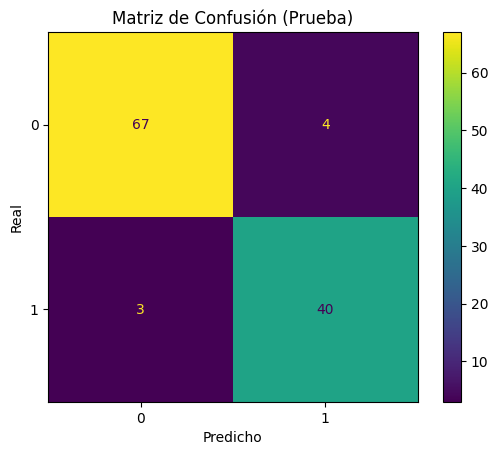

In [ ]:


# Realizar predicciones en el conjunto de prueba completo
predictions = tree_model.predict(test_data)

# Obtener la matriz de confusión
cm = confusion_matrix(test_labels, predictions)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión (Prueba)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

In [ ]:
# Realizar predicciones en el conjunto de prueba completo
predictions = tree_model.predict(test_data)

# Calcular la precisión
accuracy = accuracy_score(test_labels, predictions)
print("Precisión del modelo:", accuracy)

# Mostrar el reporte de clasificación
report = classification_report(test_labels, predictions)
print("\nReporte de Clasificación:\n", report)

Precisión del modelo: 0.9385964912280702

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



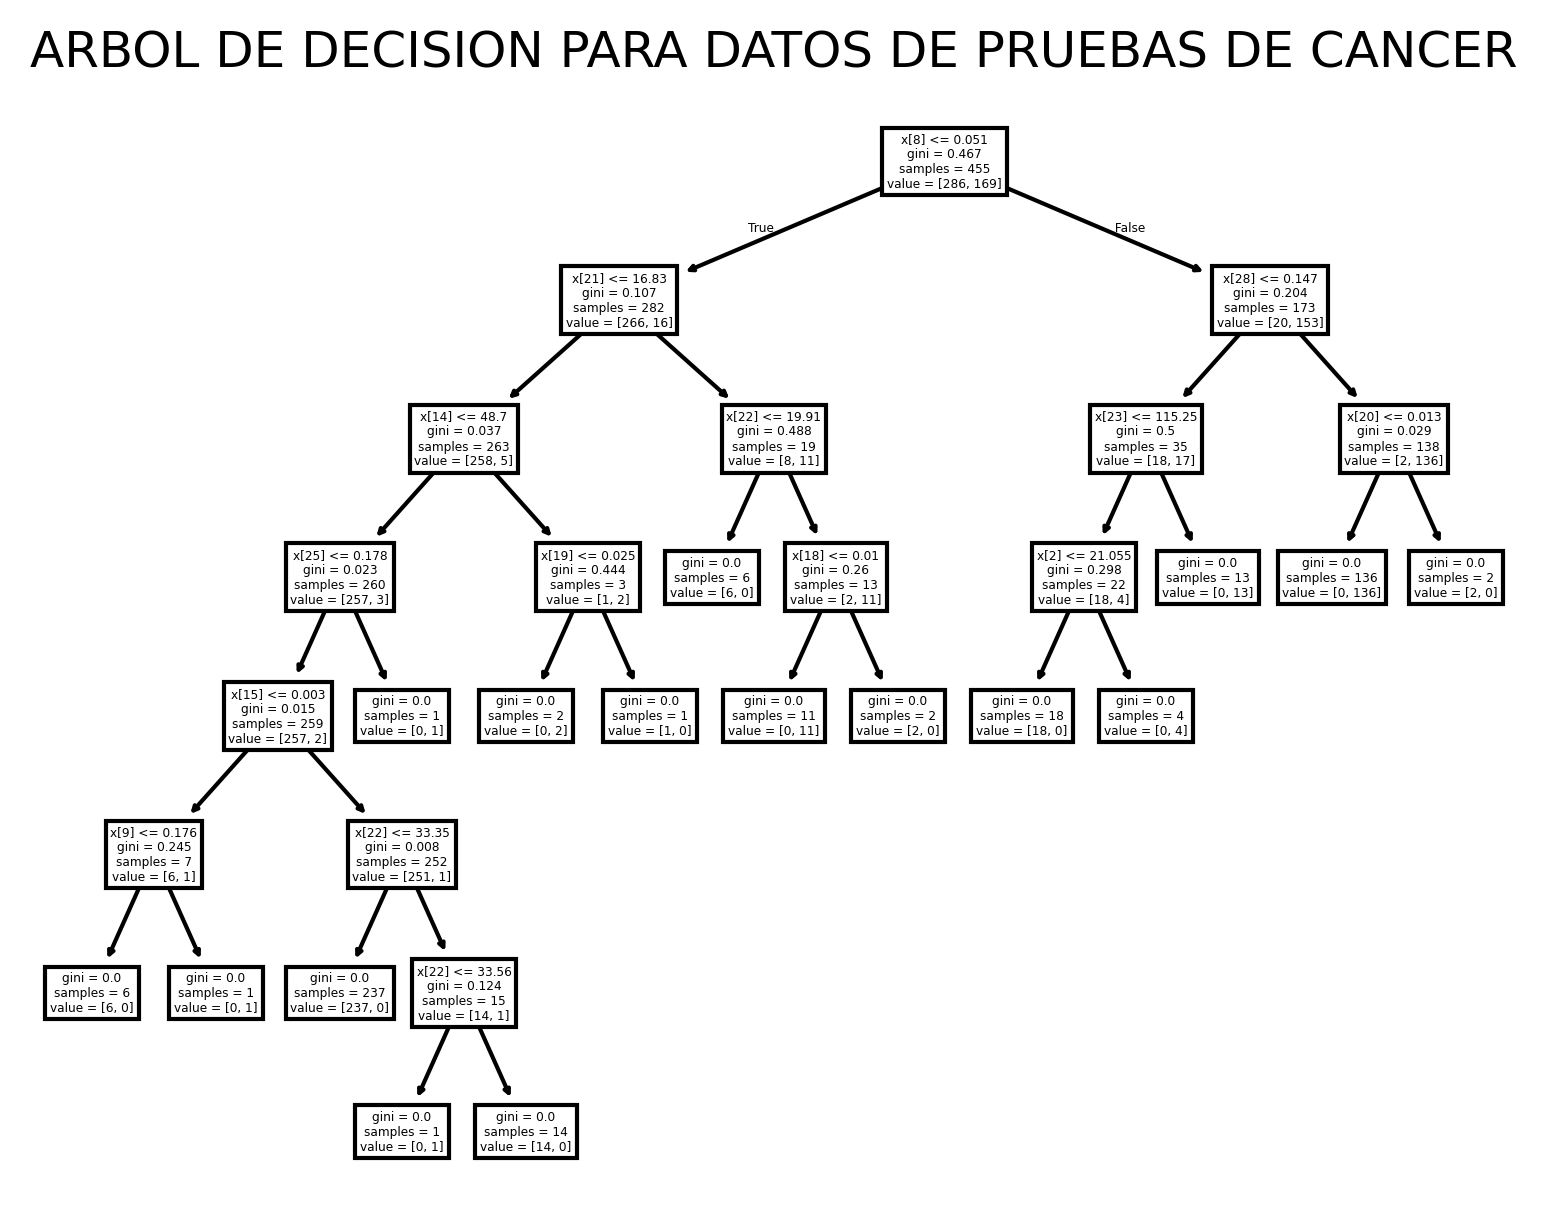

In [ ]:


# Crear la figura con el DPI deseado
plt.figure(dpi=300)

# Visualizar el árbol de decisión

tree.plot_tree(tree_model)


# Mostrar la figura
plt.title("ARBOL DE DECISION PARA DATOS DE PRUEBAS DE CANCER")
plt.show()